In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
import tensorflow as tf

In [149]:
tf.__version__

'2.9.1'

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
np.set_printoptions(suppress=True)

In [271]:
sample_data = np.load(r'C:\Users\Sivakumar\Desktop\GCN_stock_price_prediction-main\Sample_Dataset_code\stock_price_matrix_adjust.npy')
sample_data

array([[[    25.        ,     25.        ,     25.        ,
             25.        ,      0.        ],
        [     1.472     ,      1.472     ,      1.39999998,
              1.39999998,  22480.        ],
        [    23.35000038,     23.35000038,     21.14999962,
             21.14999962, 124154.        ],
        [    34.65000153,     36.45000076,     30.20000076,
             30.5       ,  16288.        ],
        [    19.39999962,     21.14999962,     19.20000076,
             20.79999924, 381921.        ]],

       [[    25.        ,     25.        ,     25.        ,
             25.        ,      0.        ],
        [     1.54499996,      1.54499996,      1.54499996,
              1.54499996,  16760.        ],
        [    23.89999962,     24.5       ,     22.20000076,
             22.20000076, 199628.        ],
        [    36.79999924,     38.59999847,     33.        ,
             35.04999924,  22900.        ],
        [    19.39999962,     20.        ,     19.10000038,
  

In [272]:
sample_data.shape

(2712, 5, 5)

In [273]:
ad_sample_data=sample_data.copy()
ad_sample_data.shape

(2712, 5, 5)

In [274]:
Label_data = ad_sample_data[:,:,0]
Label_data.shape

(2712, 5)

In [275]:
Label_data.shape[0]

2712

In [276]:
Label_data_fixed = np.zeros((Label_data.shape[0],Label_data.shape[1]))

In [277]:
for i in range(Label_data.shape[0]-1):
    for j in range(Label_data.shape[1]):
        Label_data_fixed[i+1][j]=Label_data[i+1][j]-Label_data[i][j]


In [278]:
for i in range(Label_data.shape[0]-1):
    for j in range(Label_data.shape[1]):
        if Label_data_fixed[i+1][j]>0:
            Label_data_fixed[i+1][j]=1
        else:
            Label_data_fixed[i+1][j]=0


In [279]:
pd.DataFrame(Label_data_fixed)

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...
2707,0.0,1.0,0.0,1.0,1.0
2708,0.0,1.0,1.0,0.0,1.0
2709,0.0,0.0,1.0,1.0,0.0
2710,0.0,1.0,1.0,1.0,1.0


In [280]:
Label_data_fixed=np.nan_to_num(Label_data_fixed)

In [281]:
Label_data_fixed.shape

(2712, 5)

In [282]:
p=5

In [283]:
Label_data_2 = Label_data_fixed[p-1:,:]
Label_data_2.shape

(2708, 5)

In [284]:
input_data = ad_sample_data[:,:,1:]
input_data.shape

(2712, 5, 4)

In [285]:
p=5

In [286]:
input_data_final = np.zeros((input_data.shape[0]+1-p,p,input_data.shape[1],input_data.shape[2]))
input_data_final.shape

(2708, 5, 5, 4)

In [287]:
input_data_final[0].shape

(5, 5, 4)

In [288]:
for i in range(input_data.shape[0]+1-p):
    one_line = []
    for j in range(p):
        one_line.append(input_data[i+j])
        
    input_data_final[i] = np.array(one_line)
    

In [289]:
input_data_final.shape

(2708, 5, 5, 4)

In [290]:
N=5
M=2708
P=5
F=4
TEST_SIZE = 0.3 # the test and val size of dataset
RANDOM_STATE = 4

In [291]:
T = np.load(r'C:\Users\Sivakumar\Desktop\GCN_stock_price_prediction-main\share_holding_graph\shareholding_relation_adjacent_matrix_tongyi.npy')
print(T.shape)
print(T)

(5, 5)
[[ 0.         18.79489824 10.24021964 19.05143091 12.25574277]
 [18.79489824  0.          9.51765727 37.70208823  9.57976452]
 [10.24021964  9.51765727  0.         28.05799708  5.73273033]
 [19.05143091 37.70208823 28.05799708  0.         30.23036553]
 [12.25574277  9.57976452  5.73273033 30.23036553  0.        ]]


In [292]:
S=np.load(r'C:\Users\Sivakumar\Desktop\GCN_stock_price_prediction-main\Pearson_stock_price_graph\Pearson_stock_price.npy')
print(S.shape)
print(S)

(5, 5)
[[ 1.          0.04987455  0.67080818  0.57231438 -0.27551475]
 [ 0.04987455  1.          0.04671114 -0.20652669  0.18554448]
 [ 0.67080818  0.04671114  1.          0.81072034  0.12920231]
 [ 0.57231438 -0.20652669  0.81072034  1.          0.10635695]
 [-0.27551475  0.18554448  0.12920231  0.10635695  1.        ]]


In [293]:
#T = np.random.normal(size=(N,N))
I = np.random.normal(size=(N,N))
#S = np.random.normal(size=(N,N))
print(I.shape)
print(I)


(5, 5)
[[ 0.56868282  0.62763855 -0.0325255  -0.30318226  0.69791062]
 [ 0.21587643 -0.24340335 -0.06691578  0.85768635  2.2602681 ]
 [ 0.20022294  0.43612352  0.38947199  0.43173739  0.76495628]
 [ 1.36835629 -0.21730763 -0.28147354  1.08808641 -1.04541035]
 [-0.69606092  1.3200928  -1.13330734  1.13962319  1.36028396]]


In [294]:
Fixed_Matrices = [T, I, S]

In [295]:
samples = input_data_final#np.random.normal(size=(M, P, N, F))
labels = Label_data_2#np.random.normal(size=(M, N))

In [296]:
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.33, random_state=RANDOM_STATE)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(1895, 5, 5, 4) (1895, 5)
(544, 5, 5, 4) (544, 5)
(269, 5, 5, 4) (269, 5)


In [297]:
x_train = tf.constant(x_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
x_test = tf.constant(x_test,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)
x_val = tf.constant(x_val,dtype=tf.float32)
y_val= tf.constant(y_val,dtype=tf.float32)

In [298]:
class GCGRU(tf.keras.Model):
    def __init__(self, N, F, Units_GCN, Units_GRU, Units_FC,
                 Fixed_Matrices, Matrix_Weights, Is_Dyn,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros'):
        super(GCGRU, self).__init__()
        # Number of Nodes
        self.N = N
        # the number of input features
        self.F = F
        # pre-defined matrices: shape=[(N,N),(N,N),(N,N)]
        self.mat = Fixed_Matrices
        # Dynamic Matrix:shape=(N,N)
        self.dyn = self.add_weight(name='w_Dynamic', shape=(self.N, self.N),
                                 initializer=tf.keras.initializers.get(kernel_initializer),
                                 trainable=True)

        
        if Is_Dyn:
            self.mats = self.dyn
        else:
            self.mats = self.add_weight(name='w_Matrices', shape=(self.N, self.N),
                                        initializer=tf.keras.initializers.get(kernel_initializer),
                                        trainable=True)
            for i in range(len(Matrix_Weights)):
                coe = tf.Variable(1.0,trainable=True)
                self.mats = self.mats + Matrix_Weights[i]*self.mat[i]*coe
        
        # GCN_Weights
        self.units_gcn = Units_GCN
        self.w_gcn = []
        self.b_gcn = []
        pre = self.F
        for i in range(len(self.units_gcn)):
            aft = self.units_gcn[i]
            w = self.add_weight(name='w_GCN', shape=(pre, aft),
                                initializer=tf.keras.initializers.get(kernel_initializer),
                                trainable=True)
            self.w_gcn.append(w)
            b = self.add_weight('b_GCN',shape=(aft,),
                                initializer=tf.keras.initializers.get(bias_initializer),
                                trainable=True)
            self.b_gcn.append(b)
            pre = aft
        # GRU_Weights
        self.units_gru = Units_GRU
        self.w_gru = []
        self.b_gru = []
        # the number of output features of Multi-GCN
        C = self.units_gcn[-1]
        F = self.F
        for i in range(len(self.units_gru)-1):
            H = self.units_gru[i]
            pre = F+C+H
            aft = H
            for j in range(3):
                w = self.add_weight(name='w_GRU', shape=(pre,aft),
                                    initializer=tf.keras.initializers.get(kernel_initializer),
                                    trainable=True)
                self.w_gru.append(w)
                b = self.add_weight(name='b_GRU', shape=(aft,),
                                    initializer=tf.keras.initializers.get(bias_initializer),
                                    trainable=True)
                self.b_gru.append(b)
            F = aft
        # the last layer weights
        H = self.units_gru[-2]
        G = self.units_gru[-1]
        w = self.add_weight(name='w_GRU', shape=(H,G),
                            initializer=tf.keras.initializers.get(kernel_initializer),
                            trainable=True)
        
        self.w_gru.append(w)
        b = self.add_weight(name='b_GRU', shape=(G,),
                                 initializer=tf.keras.initializers.get(bias_initializer),
                                 trainable=True)
        self.b_gru.append(b)
        
        # FC_weights
        self.units_fc = Units_FC
        self.w_fc = []
        self.b_fc = []
        pre = G
        for i in range(len(self.units_fc)):
            aft = self.units_fc[i]
            w = self.add_weight(name='w_FC', shape=(pre,aft),
                                initializer=tf.keras.initializers.get(kernel_initializer),
                                trainable=True)
            self.w_fc.append(w)
            b = self.add_weight(name='b_FC', shape=(aft,),
                                initializer=tf.keras.initializers.get(bias_initializer),
                                trainable=True)
            self.b_fc.append(b)
            pre = aft
    
    def Multi_GCN(self, inputs):
        '''
        inputs:shape=(None,P,N,F)
        x_gcn:shape=(None,P,N,C)
        '''
        P = inputs.shape[1]
        x_gcn = []
        for t in range(P):
            # (None, P, N, F) =>(None, N, F)
            xt_gcn = inputs[:,t,:,:]
            
            # (N,N)*(None, N, F)*(F,C)=> (None, N, C)
            for i in range(len(self.units_gcn)):
                xt_gcn = self.mats @ xt_gcn @ self.w_gcn[i] + self.b_gcn[i]
                xt_gcn = tf.nn.tanh(xt_gcn)
            x_gcn.append(xt_gcn)
        # (None,P,N,C)
        x_gcn = tf.stack(x_gcn, axis=1)
        return x_gcn
    
    def GRU(self, x, x_gcn):
        '''
        x:shape=(None,P,N,F)
        x_gcn:shape=(None,N,C)
        x_gru:shape=(None,N,G)
        '''
        # initialize the hidden state in each gru layer
        h_gru = []
        # (None, P, N, F)=>(None, N, F)*(F,H)=> (None, N, H)
        for i in range(len(self.units_gru)-1):
            H = self.units_gru[i]
            h = tf.zeros_like(x[:,0,:,:], dtype=tf.float32) @ tf.zeros([F, H])
            h_gru.append(h)
        
        # all gru layers at each time step
        for t in range(P):
            # (None, P, N, C) =>(None, N, C)
            xt_gcn = x_gcn[:,t,:,:]
            # (None, P, N, F) =>(None, N, F)
            xt = x[:,t,:,:]

            # the i_th layer
            for i in range(len(h_gru)):
                #(None, N, H)
                ht_1 = h_gru[i]
                #(None, N, F)+(None, N, C)+(None, N, H)=> (None, N, C+F+H)
                x_tgh = tf.concat([xt,xt_gcn,ht_1], axis=2)
                #(None, N, C+F+H)=> (None, N, H)
                ut = tf.nn.sigmoid(x_tgh @ self.w_gru[3*i+0] + self.b_gru[3*i+0])
                rt =  tf.nn.sigmoid(x_tgh @ self.w_gru[3*i+1] + self.b_gru[3*i+1])
                
                # (None, N, C+F+H)
                x_tghr = tf.concat([xt, xt_gcn, tf.multiply(rt, ht_1)], axis=2)
                
                # (None, N, H)
                ct = tf.nn.tanh(x_tghr @ self.w_gru[3*i+2] + self.b_gru[3*i+2])
                # (None, N, H)
                ht = tf.multiply(ut, ht_1) + tf.multiply((1-ut), ct)
                # (None, N, H)
                xt = ht
                # (None, N, H)
                h_gru[i]=ht
        # the last layer
        x_gru = tf.nn.sigmoid(ht @ self.w_gru[-1] + self.b_gru[-1])
        return x_gru
    
    def FC(self, x_gru):
        '''
        x_gru:shape=(None, N, G)
        outputs:shape=(None,N,1)
        '''
        x = x_gru
        for i in range(len(self.w_fc)):
            x = x @ self.w_fc[i] + self.b_fc[i]
            x = tf.nn.sigmoid(x)
        # (None, N)
        x_fc = tf.squeeze(x, axis=-1)
        return x_fc

    def build(self, input_shape):
        super().build(input_shape)
        
    def call(self, inputs):
        '''
        inputs:shape=(None,P,N,F)
        x_fc:shape=(None,N)
        '''
        # (None,P,N,C)
        x_gcn = self.Multi_GCN(inputs)
        # (None,N,G)
        x_gru = self.GRU(inputs, x_gcn)
        # (None,N)
        x_fc = self.FC(x_gru)
        return x_fc


Model: "gcgru_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 7,418
Trainable params: 7,418
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1895/1895 [==============================] - 7s 2ms/step - loss: 0.5391 - binary_accuracy: 0.6678 - val_loss: 0.5358 - val_binary_accuracy: 0.6989
Epoch 2/10
1895/1895 [==============================] - 4s 2ms/step - loss: 0.5264 - binary_accuracy: 0.6727 - val_loss: 0.5213 - val_binary_accuracy: 0.6989
Epoch 3/10
1895/1895 [==============================] - 4s 2ms/step - loss: 0.5235 - binary_accuracy: 0.6732 - val_loss: 0.5207 - val_binary_accuracy: 0.6989
Epoch 4/10
1895/1895 [==============================] - 4s 2ms/step - loss: 0.5211 - binary_accuracy: 0.6684 - val_loss: 0.5201 - val_binary_accuracy: 0.6989
Epoch 5/10
1895/1895 [==============================] - 4s 2ms/step - loss: 0.5187 -

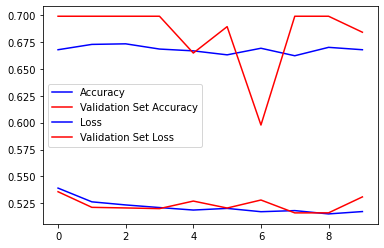

In [300]:
Units_GCN = [16,32,64]
Units_GRU = [16,32]
Units_FC = [1]
Matrix_Weights = [1,1,1]
Is_Dyn=False
    
model = GCGRU(N, F, Units_GCN, Units_GRU, Units_FC, Fixed_Matrices, Matrix_Weights,Is_Dyn)
model.build(input_shape=(None, P, N, F))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy()])
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = './500-GCGRU4',
    monitor ='val_binary_accuracy',
    save_weights_only = True,
    save_best_only = True)
Epochs =10
Batch_size = 1
History = model.fit(x_train, y_train, batch_size=Batch_size, epochs=Epochs, callbacks=[model_checkpoint], validation_data=(x_val, y_val))

# Overfitting Observation
#print(History.history)


acc = History.history['binary_accuracy']
val_acc = History.history['val_binary_accuracy']
E = [i for i in range(Epochs)]
plt.plot(E, acc,'b-',label='Accuracy')
plt.plot(E, val_acc,'r-',label='Validation Set Accuracy')
plt.legend()

acc1 = History.history['loss']
val_acc1 = History.history['val_loss']
E = [i for i in range(Epochs)]
plt.plot(E, acc1,'b-',label='Loss')
plt.plot(E, val_acc1,'r-',label='Validation Set Loss')
plt.legend()

# Prediction
model.load_weights('./500-GCGRU4')
result = model.evaluate(x_test, y_test)
print(result)
